In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

In [2]:
# import and format the data
data = pd.read_csv("processed_code_solutions/features_data.csv")
data = data.sort_values("source").reset_index(drop=True)
data["source"] = data["source"].replace({"bard":"Bard", "gpt3.5":"ChatGPT-3.5", "bing":"Bing", "gpt4":"ChatGPT-4", "student":"Human"})
data["source"] = pd.Categorical(data["source"], ["Bard", "ChatGPT-3.5", "Bing", "ChatGPT-4", "Human"])

In [3]:
# give the columns human-readable names
data.columns = ["name", "source", "style", "version", "code", "Number of characters", "Number of lines", "Average line length", "Maximum line length", "Number of (scaled) comments", 
                "Number of (scaled) if statements", "Number of (scaled) for loops", "Number of (scaled) switch statements", 
                "Number of (scaled) digits", "Number of (scaled) exceptions thrown", "Number of (scaled) empty lines", 
                "Number of (scaled) print statements", "used_boolean", "used_List", "used_Integer", "used_Point", "used_arrayList", "used_stringBuilder", "Number of (scaled) files", 
                "Number of (scaled) method declarations", "Number of (scaled) field variables declared", "Number of (scaled) local variables declared", 
                "Number of (scaled) classes", "Number of (scaled) variables referenced", "Number of (scaled) method invocations", 
                "Number of (scaled) imports", "Average variable name length", "Maximum variable name length", "Average comment length", "Maximum comment length"]

In [4]:
# find the proportions of solutions with 0 exceptions thrown, for a later plot
data["Number of exceptions thrown"] = (data["Number of (scaled) exceptions thrown"] * data["Number of lines"]).astype("int")
source_exceptions = data.groupby(["source", "Number of exceptions thrown"])["Number of exceptions thrown"].count().rename("exceptions_count").reset_index()
source_exceptions["proportion_of_0"] = source_exceptions["exceptions_count"] / source_exceptions.groupby("source")["exceptions_count"].transform("sum")
source_exceptions = source_exceptions[source_exceptions["Number of exceptions thrown"] == 0].set_index("source")["proportion_of_0"]

In [5]:
# additional information for the plots
colours = {"Human": (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
           "Bard": (1.0, 0.8509803921568627, 0.1843137254901961),
           "Bing": (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
           "ChatGPT-3.5": (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
           "ChatGPT-4": (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)}
aspects = [value for value in list(data.columns[5:]) if "used" not in value]
two_aspects=["Number of (scaled) method invocations", "Number of (scaled) field variables declared"]

In [9]:
plt.rcParams.update({"font.size": 14})

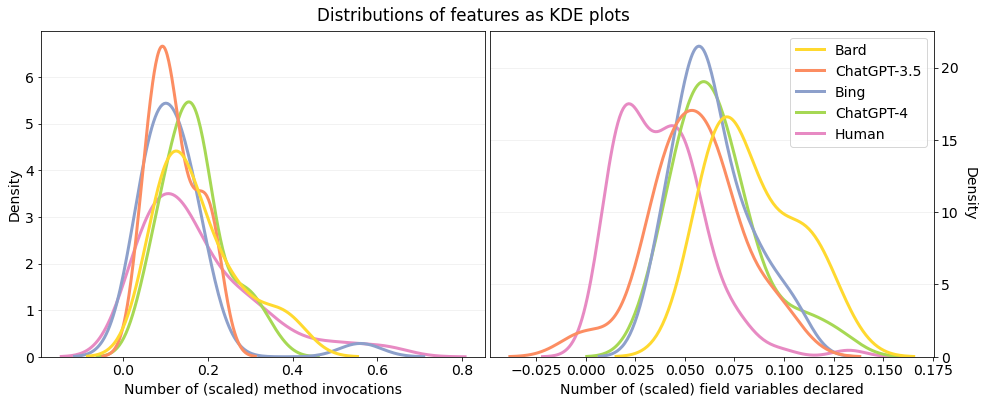

In [10]:
# create the plot
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(16, 6))
fig.subplots_adjust(wspace=0.01)

# plot the distributions of the two features 
for ax, aspect in zip(axes, two_aspects):
    sns.kdeplot(data=data, 
                x=aspect, 
                hue="source", 
                linewidth=3, 
                common_norm=False, 
                palette=colours, 
                ax=ax)
    ax.grid(alpha=0.2, 
            axis="y")

# adjust the labels for the plots
fig.suptitle("Distributions of features as KDE plots", y=0.935)
axes[0].get_legend().remove()
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[1].set_ylabel("Density", rotation=270, labelpad=18);
ax.legend_.set_title(None)

# save the x-axis limits to use in the following plot
ax0_xlim = axes[0].get_xlim()
ax1_xlim = axes[1].get_xlim()

# save the plot
plt.savefig("plots/single_feature_kde.png", 
            dpi=300,
            bbox_inches="tight",
            facecolor="white")

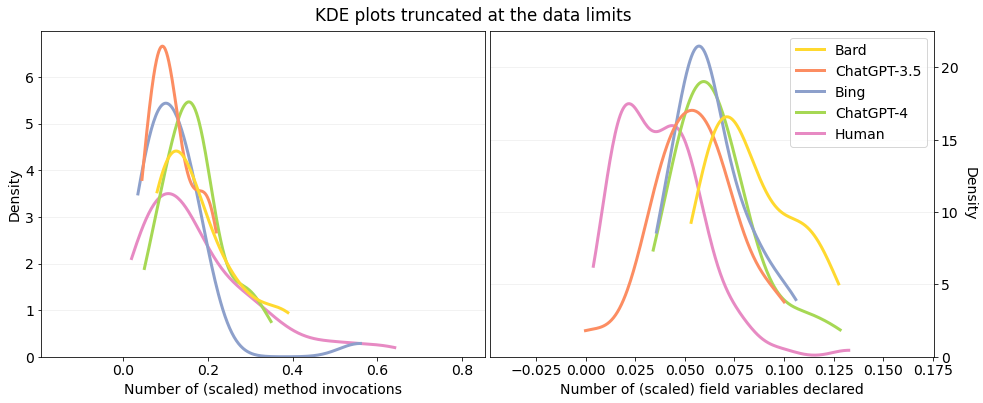

In [11]:
# create the plot
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(16, 6))
fig.subplots_adjust(wspace=0.01)

# plot the distributions of the two features
for ax, aspect in zip(axes, two_aspects):
    sns.kdeplot(data=data, 
                x=aspect, 
                hue="source", 
                linewidth=3, 
                common_norm=False, 
                palette=colours, 
                cut=0, 
                ax=ax)
    ax.grid(alpha=0.2, axis="y")
    
# adjust the labels for the plots
fig.suptitle("KDE plots truncated at the data limits", y=0.935) 
axes[0].get_legend().remove()
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[1].set_ylabel("Density", rotation=270, labelpad=18);
ax.legend_.set_title(None)

# set the x-axis limits to the same as the previous plot
axes[0].set_xlim(ax0_xlim)
axes[1].set_xlim(ax1_xlim);

# save the plot
plt.savefig("plots/single_feature_kde_cut.png", 
            dpi=300,
            bbox_inches="tight",
            facecolor="white")

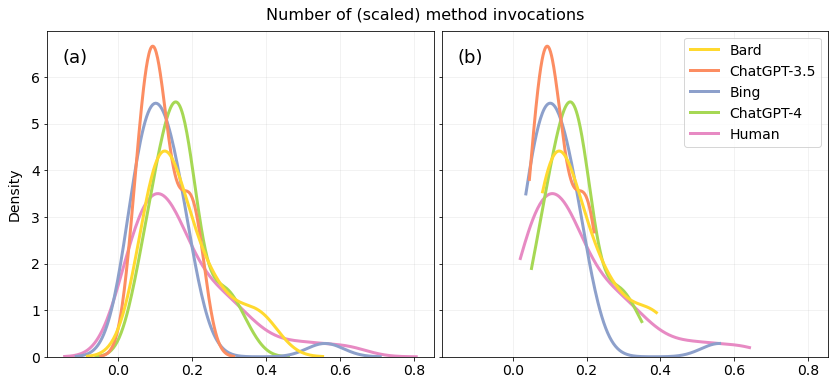

In [12]:
# creating a plot for the report
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         sharey=True,
                         sharex=True,
                         figsize=(14, 6))
fig.subplots_adjust(wspace=0.02)
fig.suptitle("Number of (scaled) method invocations", y=0.935, fontsize=16)

# plot the full distribution
sns.kdeplot(data=data, 
            x="Number of (scaled) method invocations", 
            hue="source", 
            linewidth=3, 
            common_norm=False, 
            palette=colours,
            ax=axes[0])


# plot the truncated distribution
sns.kdeplot(data=data, 
            x="Number of (scaled) method invocations", 
            hue="source", 
            linewidth=3, 
            common_norm=False, 
            palette=colours,
            cut=0,
            ax=axes[1])

# adjusting the labels
axes[0].grid(alpha=0.2)
axes[1].grid(alpha=0.2)
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[1].text(-0.15, 6.3, "(b)", fontsize=18)
axes[0].text(-0.15, 6.3, "(a)", fontsize=18)
axes[1].legend_.set_title(None)
axes[0].get_legend().remove()
axes[0].set_ylabel("Density", labelpad=10)

# saving the plot for the report
plt.savefig("report_plots/single_feature_kde_cut.png", 
            dpi=300,
            bbox_inches="tight",
            facecolor="white")

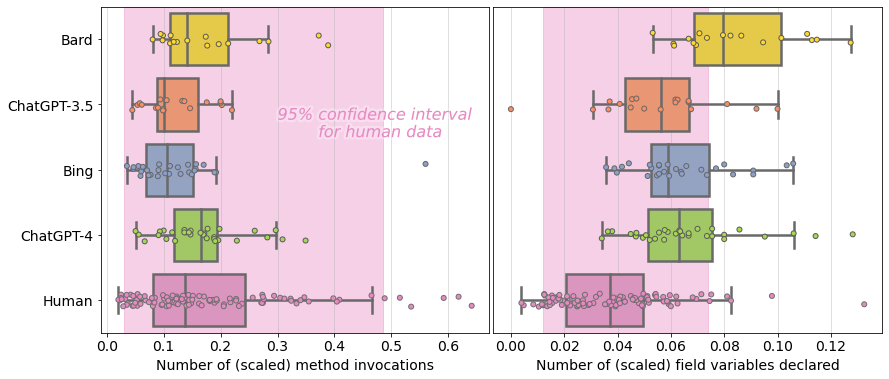

In [13]:
# create the plot
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(14, 6))
fig.subplots_adjust(wspace=0.01)

# plot each of the features
for ax, aspect in zip(axes, two_aspects):
    
    # create the box plots
    sns.boxplot(data=data, 
                x=aspect, 
                y="source", 
                linewidth=2.5, 
                zorder=5, 
                palette=colours, 
                showfliers=False,
                order=["Bard", "ChatGPT-3.5", "Bing", "ChatGPT-4", "Human"], 
                capprops={"color":"dimgray"}, 
                boxprops={'edgecolor':'dimgray'}, 
                medianprops={'color':'dimgray'}, 
                whiskerprops={'color':'dimgray'},
                ax=ax)
    
    # overlay with the stripplots
    sns.stripplot(data=data, 
                  x=aspect, y="source", 
                  hue="source", 
                  palette=colours, 
                  edgecolor='gray', 
                  linewidth=1,
                  zorder=10,
                  order=["Bard", "ChatGPT-3.5", "Bing", "ChatGPT-4", "Human"], 
                  ax=ax)
    
    # adjust the labels
    ax.set_axisbelow(True)
    ax.set_ylabel("")
    ax.get_legend().remove()
    ax.grid(alpha=0.5, axis="x")
    
    # create a band for the confidence interval
    ax.axvspan(np.percentile(data[data["source"]=="Human"][aspect], 5), 
               np.percentile(data[data["source"]=="Human"][aspect], 95),
               alpha=0.4, 
               color=colours["Human"], 
               zorder=-5)
    
# label the confidence interval
axes[0].text(x=0.30, 
             y=1.5, 
             s="95% confidence interval\n        for human data", 
             size=16, 
             color=colours["Human"], 
             fontstyle="italic",
             path_effects=[pe.withStroke(linewidth=5, 
                                         foreground="white", 
                                         alpha=0.3)])
axes[1].set_yticks([]);

# save the plot
plt.savefig("plots/single_feature_boxplots.png", 
            dpi=300,
            bbox_inches="tight",
            facecolor="white")

# # modifying the plot for the report
# axes[0].set_title("Number of (scaled) method invocations", fontsize=14, pad=10)
# axes[1].set_title("Number of (scaled) field variables declared", fontsize=14, pad=10)
# axes[0].set_xlabel("")
# axes[1].set_xlabel("")

# # saving the plot for the report
# plt.savefig("report_plots/single_feature_boxplots.png", 
#             dpi=300,
#             bbox_inches="tight",
#             facecolor="white")

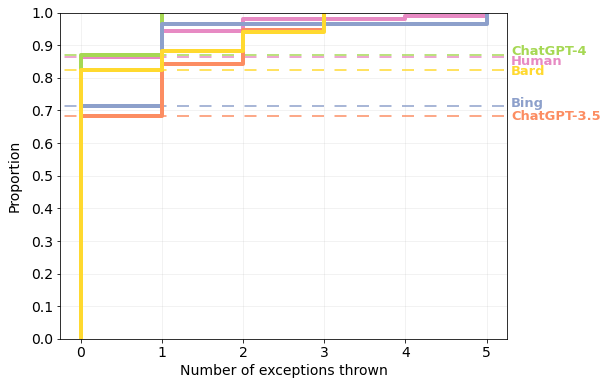

In [14]:
# create the plot
fig, ax = plt.subplots(figsize=(8, 6))
fig.subplots_adjust(hspace=0.1)

# create lines marking the proprtion of solutions with 0 exceptions thrown
for source in ['Bard', 'ChatGPT-3.5', 'Bing', 'ChatGPT-4', 'Human']:
    ax.axhline(y=source_exceptions[source], 
               xmin=0,
               xmax=1,
               linewidth=1.5, 
               linestyle=(12, (8, 7)),
               alpha=1,
               color=colours[source])
    
# create the ecdf plot
sns.ecdfplot(data=data, 
             x="Number of exceptions thrown", 
             hue="source",
             linewidth=4,
             palette=colours,
             ax=ax)
ax.get_legend().remove()

# set labels
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.grid(alpha=0.2)
ax.set_ylabel("Proportion", labelpad=10)

# label the lines
for y_coord, label in zip([0.87, 0.84, 0.81, 0.71, 0.67],
                          ["ChatGPT-4", "Human", "Bard", "Bing", "ChatGPT-3.5"]):
    ax.text(x=5.3, 
             y=y_coord, 
             s=label, 
             weight="bold",
             fontsize=13,
             color=colours[label])

# save the plot
plt.savefig("plots/exceptions_thrown_ecdf.png", 
            dpi=300,
            bbox_inches="tight",
            facecolor="white")

# saving the plot for the report
plt.savefig("report_plots/exceptions_thrown_ecdf.png", 
              dpi=300,
              bbox_inches="tight",
              facecolor="white")

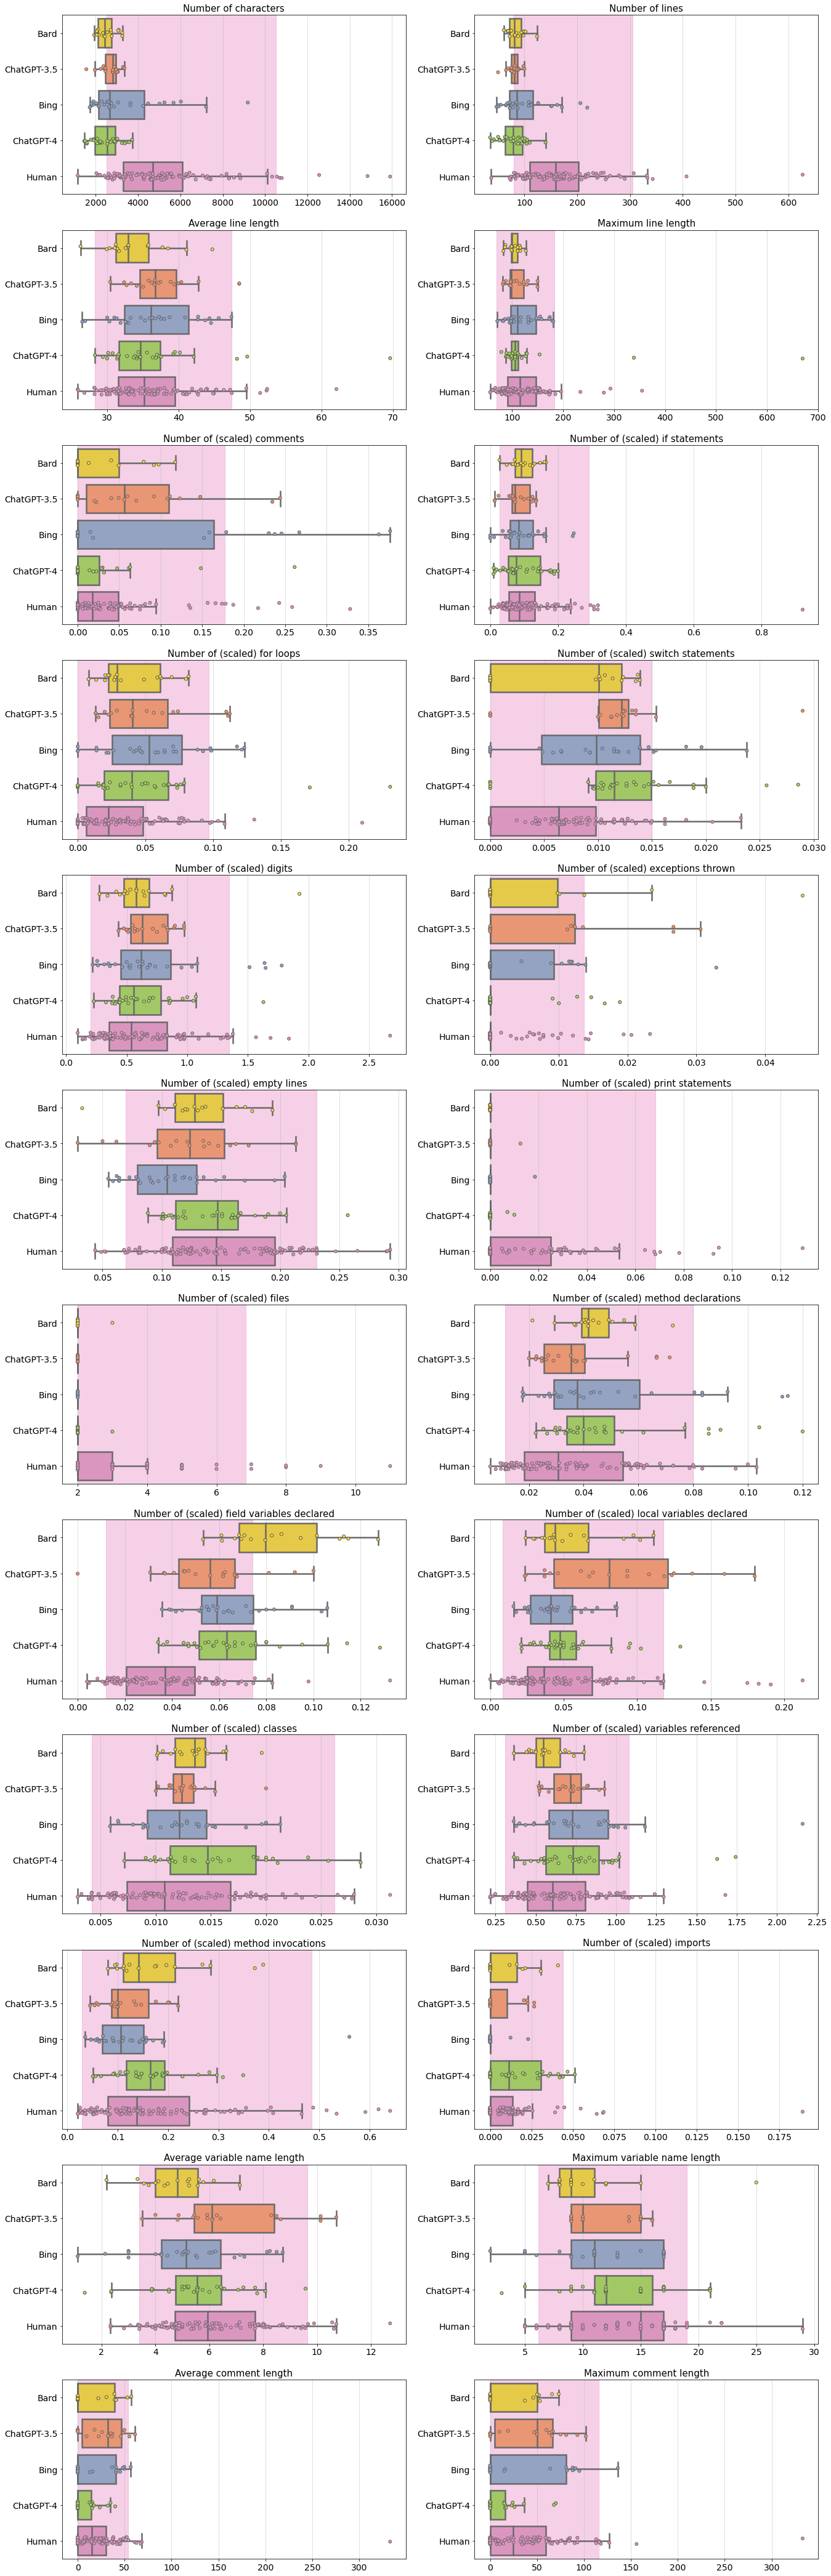

In [15]:
# create the plots
fig, axes = plt.subplots(ncols=2, nrows=12, figsize=(22, 76))

# plot each of the continuous features
for ax, aspect in zip(axes.reshape(-1), aspects):
    
    # create the boxplots
    sns.boxplot(data=data, 
                x=aspect, 
                y="source", 
                linewidth=2.5, 
                zorder=5, 
                palette=colours,
                showfliers=False,
                ax=ax, 
                order=["Bard", "ChatGPT-3.5", "Bing", "ChatGPT-4", "Human"],
                capprops={"color":"dimgray"}, 
                boxprops={'edgecolor':'dimgray'}, 
                medianprops={'color':'dimgray'}, 
                whiskerprops={'color':'dimgray'})
    
    # overlay with the stripplots
    sns.stripplot(data=data, 
                  x=aspect, 
                  y="source", 
                  hue="source", 
                  palette=colours, 
                  edgecolor='gray', 
                  linewidth=1, 
                  zorder=10,
                  order=["Bard", "ChatGPT-3.5", "Bing", "ChatGPT-4", "Human"], 
                  ax=ax)
    
    # adjust the labels
    ax.set_axisbelow(True) 
    ax.grid(alpha=0.5, axis="x")
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(aspect, fontsize=15)
    ax.get_legend().remove()
    
    # create a band for the confidence interval
    ax.axvspan(np.percentile(data[data["source"]=="Human"][aspect], 5), np.percentile(data[data["source"]=="Human"][aspect], 95),
               alpha=0.4, color=colours["Human"], zorder=-5)